In [2]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt 

In [253]:
model = keras.models.load_model('./models/sonnenschein')
test = pd.read_csv("./test_data.csv")[["age", "sex", "payment_type", "was_canceled"]]

In [200]:
#test = test[test["was_canceled"] == 1].reset_index(drop=True)
test

,age,sex,payment_type,was_canceled
0,17,1,0,1
1,26,0,0,0
2,81,1,0,1
3,44,1,0,1
4,19,0,1,0
...,...,...,...,...
193,25,0,1,0
194,41,0,1,1
195,56,0,0,0
196,84,1,0,1


In [252]:
age_test = np.asarray(test["age"])
sex_test = np.asarray(test["sex"].astype("int32"))
payment_type_test = np.asarray(test["payment_type"].astype("int32"))
X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
y_test = (test['was_canceled']>0.1)
y_test
X_Test

array([[17,  1,  0],
       [26,  0,  0],
       [81,  1,  0],
       [44,  1,  0],
       [19,  0,  1],
       [34,  1,  0],
       [18,  1,  0],
       [54,  1,  2],
       [19,  0,  0],
       [46,  1,  2],
       [45,  0,  1],
       [24,  0,  0],
       [70,  0,  0],
       [21,  0,  0],
       [30,  0,  0],
       [31,  0,  0],
       [18,  1,  0],
       [50,  0,  1],
       [76,  1,  1],
       [56,  0,  1],
       [46,  1,  0],
       [37,  0,  0],
       [53,  0,  1],
       [65,  0,  1],
       [52,  0,  1],
       [17,  1,  0],
       [42,  1,  0],
       [84,  0,  0],
       [75,  1,  0],
       [18,  1,  0],
       [80,  1,  0],
       [63,  0,  0],
       [45,  0,  0],
       [18,  0,  1],
       [27,  1,  1],
       [40,  0,  0],
       [65,  1,  2],
       [19,  1,  1],
       [50,  1,  2],
       [46,  0,  0],
       [80,  1,  1],
       [49,  1,  0],
       [43,  1,  1],
       [42,  1,  0],
       [45,  0,  2],
       [61,  1,  1],
       [46,  1,  0],
       [77,  

In [45]:
X_Test[0]

array([17,  1,  0], dtype=int64)

In [254]:
threshold_range = np.arange(0, 1, 0.01)
precision_list = []
predicitions = model.predict(X_Test)


threshold_list = []
real_label_list = []
for threshold in threshold_range:
    threshold_inner_list = []
    real_label_inner_list = []
    for i, pred in enumerate(predicitions):
        if (pred > threshold):
            threshold_inner_list.append(True)
            real_label_inner_list.append(y_test[i])
        else:
            threshold_inner_list.append(False)
            real_label_inner_list.append(y_test[i])
            
            
       
    threshold_list.append(threshold_inner_list)
    real_label_list.append(real_label_inner_list)

    
    
y_test = list(y_test)
precision_list = []
for i, predicted_label in enumerate(threshold_list):
    precision = precision_score(list(real_label_list[i]), list(predicted_label), average="micro")
    
    precision_list.append(precision)

7/7 [==============================] - 0s 1000us/step


In [195]:
real_label_list

[[True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,

In [84]:
y_test

0     True
1     True
2     True
3     True
4     True
      ... 
90    True
91    True
92    True
93    True
94    True
Name: was_canceled, Length: 95, dtype: bool

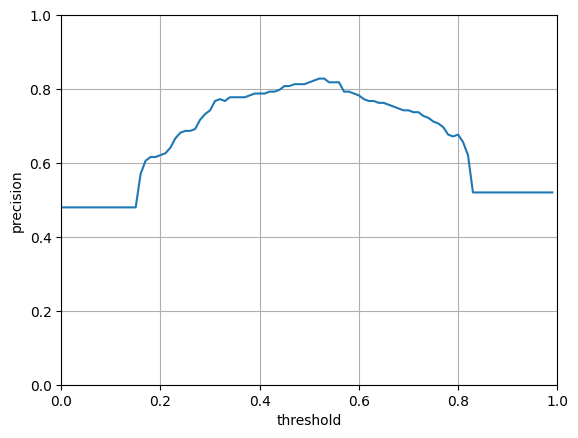

In [255]:
plt.plot(threshold_range, precision_list)
plt.ylabel('precision')
plt.xlabel('threshold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()

In [256]:
test = pd.read_csv("./test_data.csv")[["age", "sex", "payment_type", "was_canceled"]]
age_test = np.asarray(test["age"])
sex_test = np.asarray(test["sex"].astype("int32"))
payment_type_test = np.asarray(test["payment_type"].astype("int32"))
X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
y_test = (test['was_canceled']>0.1)


7/7 [==============================] - 0s 833us/step


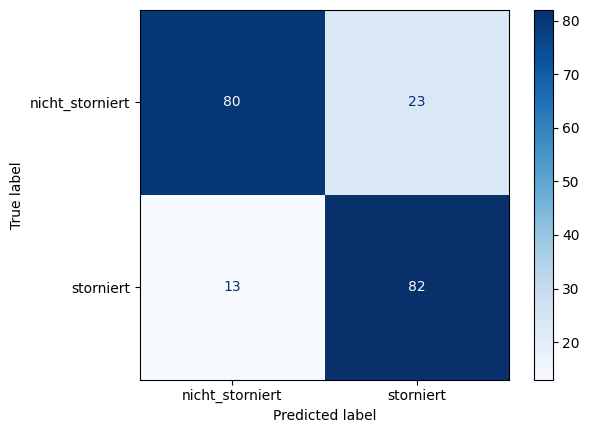

In [263]:



predicition = model.predict(X_Test)
y_predict = (predicition>0.5)


threshold_predict = []
threshold_real = []
for i, predict in enumerate(predicition):
    if predict > 0.5:
        threshold_predict.append(True)
        threshold_real.append(y_test[i])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()

In [227]:
threshold_range = np.arange(0, 1, 0.01)

predicition = model.predict(X_Test)
y_predict = (predicition>0.5)

threshold_predicted_list = []
real_list = []
for threshold in threshold_range:
    pred = []
    true = []
    for i, predict in enumerate(predicition):
        if predict > threshold:
            pred.append(True)
            true.append(y_test[i])
    threshold_predicted_list.append(pred)
    real_list.append(true)

7/7 [==============================] - 0s 1ms/step


In [239]:
real_list

[[True,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  False,
  

In [243]:


result_list = []

for pred_list, true_list in zip(threshold_predicted_list, real_list):
    same = 0
    different = 0
    for pred, true in zip(pred_list, true_list):

        if pred == true:
            same += 1
        else:
            different += 1
    result_list.append([same, different])

In [245]:
same_list = []
difference_list = []
for result in result_list:
    same_list.append(result[0])
    difference_list.append(result[1])
    

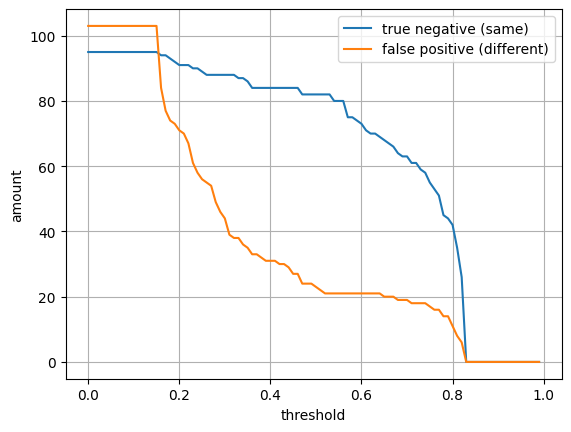

In [250]:
plt.plot(threshold_range, same_list, label="true negative (same)")
plt.plot(threshold_range, difference_list, label="false positive (different)")
plt.ylabel('amount')
plt.xlabel('threshold')
plt.grid()
plt.legend(loc="upper right")